In [1]:
# we want to use this to calculate cost of Health insurance 

In [2]:
#importing the dependecies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [3]:
health_data = pd.read_csv('/content/insurance.csv')

In [4]:
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
health_data.shape

(1338, 7)

In [6]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
#we notice that the Sex,Smoker and region colums arenoit objects but integers


In [8]:
health_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
#now we have to encode our data by turning objects into int

In [10]:
# health_data = health_data.replace({'sex':{'female':0,'male':1},
#                      'smoker':{'yes':0,'no':1},
#                      'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}})

In [11]:
health_data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Exploratory Data Analysis

In [13]:
health_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
#off the 7 colums we have, 3 columns are purely categorical 

# SEX
# SMOKER
# REGION 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


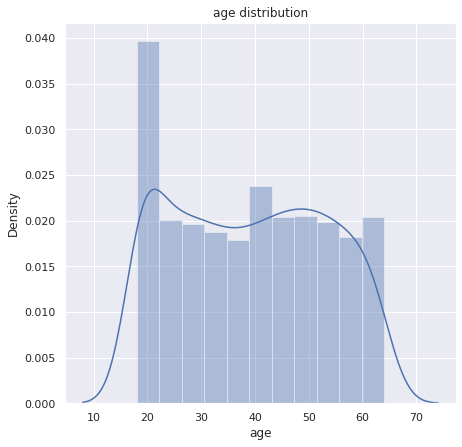

In [15]:
#since this is EDA, we hyave to find the distribution of our data

#so lets gets the distribution of the age value 

sns.set()
plt.figure(figsize=(7,7))
sns.distplot(health_data['age'])
plt.title('age distribution')
plt.show()

# SNS.SET()is supposed to give the graph a good grid 

# YOU ONLY HAVE TO USE SNS.SET ONCE AND IT STAYS THROUGHOUT

In [16]:
# NOW MOVING TO SEX,WE CANT USE A DISTRIBUTION GRAPH FORAGE BECAUSE THERE ARE ONLY
#TWO OPTIONS
# SOWE HAVE TO USE A COUNT PLOT 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


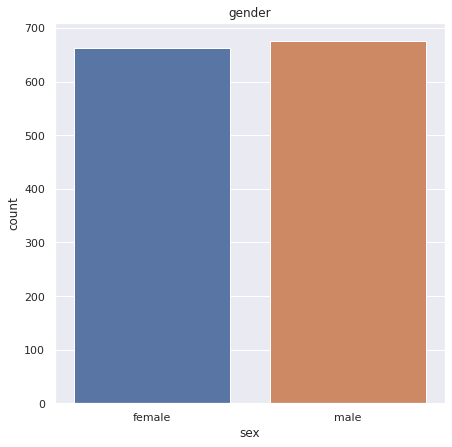

In [17]:
plt.figure(figsize=(7,7))
sns.countplot(health_data['sex'])
plt.title('gender')
plt.show()

always do your EDA before encoding, thats the issues youll have here now,with the 1 and 0's and not the actual names

In [18]:
health_data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [19]:
# MOVING NOW TO THE BMI (BODY MASS INDEX)
# BMI ISNT A CATEGORICAL COLUMN,SO WE WILL USETHE DITRIBUTION PLOT FOR IT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

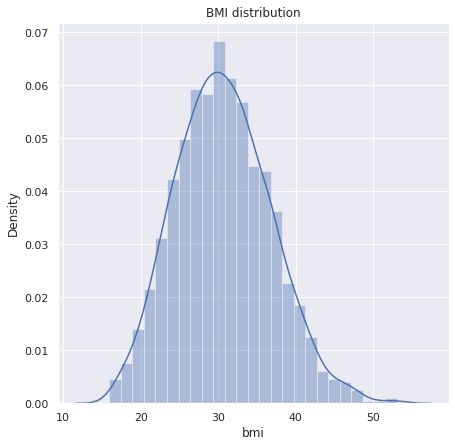

In [20]:
plt.figure(figsize=(7,7))
sns.distplot(health_data['bmi'])
plt.title('BMI distribution')
plt.show

NORMAL BMI RANGE --> 18.5 to 24.9.

using this to compare with our distribution, we see that a lot of people are overweight

In [21]:
# #NOW WEMOVE TO THE CHILDREN COLUMN.
# THE DATA RANGE IN CHILDREN ISNT A LOT, SO A DISTPLOT WOULDNT BE IDEAL,
# BETTER TO USE A COUNT PLOT

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show>

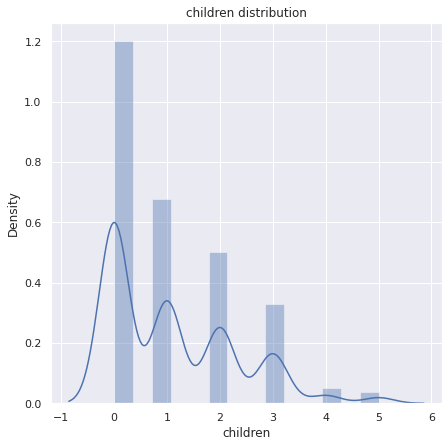

In [22]:
plt.figure(figsize=(7,7))
sns.distplot(health_data['children'])
plt.title('children distribution')
plt.show

#you see that this doesnt make a lot of sense 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


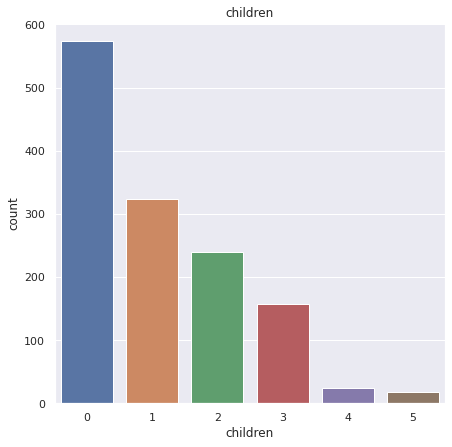

In [23]:
plt.figure(figsize=(7,7))
sns.countplot(health_data['children'])
plt.title('children')
plt.show()

#this is best for this data 

In [24]:
health_data['children'].value_counts()


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [25]:
#now to the smoker column, 
# well use the count plot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


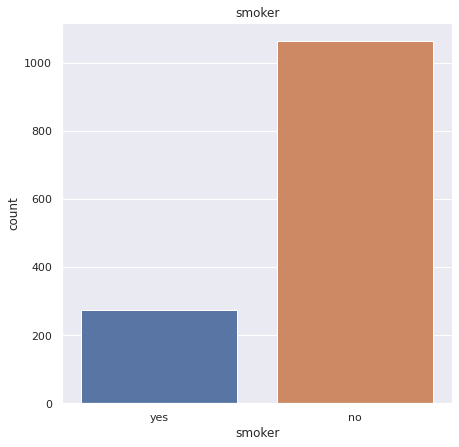

In [26]:
plt.figure(figsize=(7,7))
sns.countplot(health_data['smoker'])
plt.title('smoker')
plt.show()


In [27]:
health_data['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

In [28]:
#NOW MOVING ON TO THE REGION SECTION
# WELL STILL USE VALUE COUNTS 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


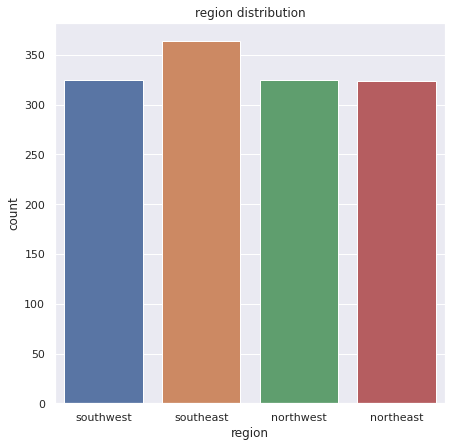

In [29]:
plt.figure(figsize=(7,7))
sns.countplot(health_data['region'])
plt.title('region distribution')
plt.show()


In [30]:
health_data['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [31]:
#NOW MOVING TO CHARGES
# WE HAVE TO USE A DISTPLOT

<function matplotlib.pyplot.show>

<Figure size 504x504 with 0 Axes>

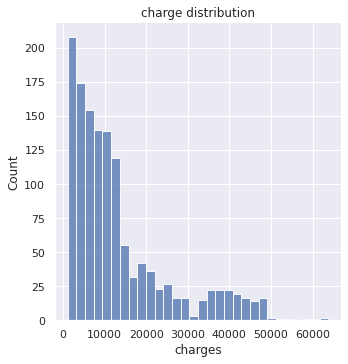

In [32]:
plt.figure(figsize=(7,7))
sns.displot(health_data['charges'])
plt.title('charge distribution')
plt.show

<function matplotlib.pyplot.show>

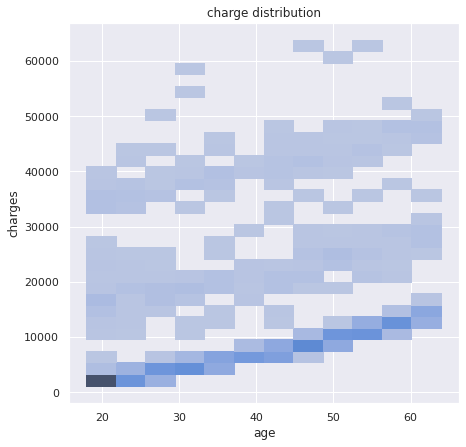

In [33]:
plt.figure(figsize=(7,7))
sns.histplot(health_data,x='age',y='charges')
plt.title('charge distribution')
plt.show

Data preprocessing

Encoding the categorical features


In [34]:
health_data = health_data.replace({'sex':{'female':0,'male':1},
                     'smoker':{'yes':0,'no':1},
                     'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}})

In [35]:
health_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,0,1725.55230
2,28,1,33.000,3,1,0,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,1,2,10600.54830
1334,18,0,31.920,0,1,3,2205.98080
1335,18,0,36.850,0,1,0,1629.83350
1336,21,0,25.800,0,1,1,2007.94500


In [54]:
health_data.groupby('smoker').mean()

,age,sex,bmi,children,region,charges
smoker,,,,,,
0,38.514599,0.580292,30.708449,1.113139,1.368613,32050.231832
1,39.385338,0.485902,30.651795,1.090226,1.477444,8434.268298


Splitting the data 

In [36]:
X= health_data.drop('charges',axis =1)
Y= health_data['charges']

In [37]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,0
2,28,1,33.000,3,1,0
3,33,1,22.705,0,1,2
4,32,1,28.880,0,1,2


In [38]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Splitting into training and test data

In [39]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [40]:
print(X_train.shape,X_test.shape,Y_test.shape)

(1070, 6) (268, 6) (268,)


training our model 

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [43]:
training_data_prediction = model.predict(X_train)

In [44]:
training_data_performanc_value = metrics.r2_score(Y_train,training_data_prediction)
print('the training data performance of our model is:', training_data_performanc_value)

the training data performance of our model is: 0.7518195459072954


In [45]:
#for test data
test_data_prediction = model.predict(X_test)

In [47]:
test_data_accuracy = metrics.r2_score(Y_test,test_data_prediction)
print('the test data performance of our model is:', test_data_accuracy)


the test data performance of our model is: 0.7454471618659976


trying another regressor model 

In [48]:
new_model=RandomForestRegressor()

In [49]:
new_model.fit(X,Y)

RandomForestRegressor()

In [50]:
training_data_new_prediction=new_model.predict(X_train)

In [51]:
accuracy = metrics.r2_score(Y_train,training_data_new_prediction)

In [52]:
print(accuracy)

0.9771074766874682


In [ ]:
# now for the test data

In [53]:
test_data_prediction = new_model.predict(X_test)
test_data_accuracy = metrics.r2_score(Y_test,test_data_prediction)


print('test data performance of our model is:', test_data_accuracy)

test data performance of our model is: 0.9733032972228138


In [62]:
new_data = ([[27,1,42.13,0,0,0]])

# new_data = new_data.replace({'sex':{'female':0,'male':1},
#                      'smoker':{'yes':0,'no':1},
#                      'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}})

new_data_prediction=new_model.predict(new_data)

print('test data performance of our model is:', new_data_prediction)



test data performance of our model is: [39500.0798804]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
